# Introduction



# The (Combined) Metric

To decide the best neighborhood in Pittsburgh, we combined our three individual metrics into one by looking for a neighborhood that covered all of our individual metrics.

The best neighborhood had to be among the neighborhoods with the most acres of park, the most public art installations, and the best parking rates and number of available parking locations.

No neighborhood won all three metrics in first place, so we decided to reduce the data by dividing our outcomes by the max values of each, so that all of our numbers would be reduced to percentages of the highest value. That way, we could combine all of our data without having to worry about the differences in data sizes.

# The Best Neighborhood

Drumroll please ... 🥁

**Squirrel Hill!**

Below is some code to visualize the data that went into making this decision:

neighborhood
Squirrel Hill South    1.000000
Highland Park          0.371571
Perry North            0.252426
Beltzhoover            0.077755
South Side Slopes      0.069117
Name: acreage, dtype: float64


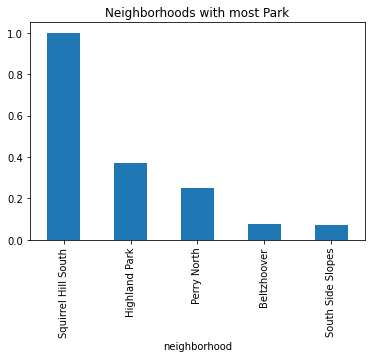

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
%matplotlib inline
%store -r reduced_acreage
print(reduced_acreage.head(5))
reduced_acreage.head(5).plot(kind='bar', title="Neighborhoods with most Park")

neighborhood
Central Business District    1.000000
Squirrel Hill South          0.740741
Allegheny Center             0.666667
Highland Park                0.370370
South Side Flats             0.333333
dtype: float64


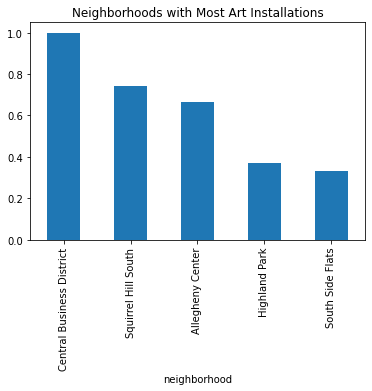

In [21]:
%store -r percent_art
print(percent_art.head(5))
percent_art.head(5).plot(kind='bar', title="Neighborhoods with Most Art Installations")

node
South Side       0.833333
Squirell Hill    0.816514
Uptown           0.775229
East Liberty     0.770642
Strip Distri*    0.729358
Name: combined, dtype: float64


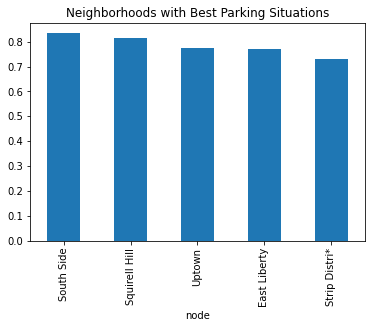

In [38]:
%store -r best_parking

# Combine the parking rates and parking locations data and average, row-wise
best_parking['combined'] = best_parking[['rates', 'count']].astype(float).mean(axis=1)

print(best_parking['combined'].sort_values(ascending=False).head(5))
best_parking['combined'].sort_values(ascending=False).head(5).plot(kind='bar', title="Neighborhoods with Best Parking Situations")

Squirrel Hill South          1.740741
Central Business District    1.008461
South Side                   0.833333
East Liberty                 0.819641
Squirell Hill                0.816514
dtype: float64


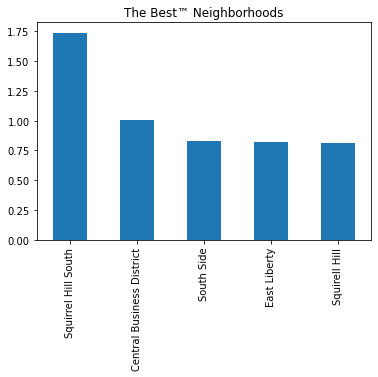

In [41]:
best_neighborhoods = (reduced_acreage.add(percent_art, fill_value=0).add(best_parking['combined'], fill_value=0)).sort_values(ascending=False).head(5)
print(best_neighborhoods)
best_neighborhoods.plot(kind='bar', title="The Best™ Neighborhoods")